# KNN (algorytm najbliższych sąsiadów)

In [37]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Dokładność klasyfikacji:  0.9473684210526315


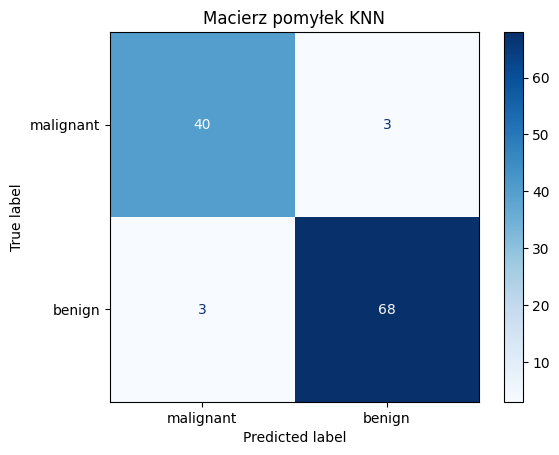

              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

# podział danych x i y
X = df.drop(columns=['target'])
y = df['target']

# podział danych na treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standaryzacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# model KNN
model = KNeighborsClassifier(n_neighbors=5)  #tworzenie modelu KNN
model.fit(X_train, y_train)  # trenowanie modelu

# predykcja
y_pred = model.predict(X_test)

# dokładność modelu
print("Dokładność klasyfikacji: ", accuracy_score(y_test, y_pred))

# macierz pomyłek
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap="Blues")
plt.title("Macierz pomyłek KNN")
plt.grid(False)
plt.show()

# raport klasyfikacyjny
print(classification_report(y_test, y_pred, target_names=data.target_names))

In [39]:
metrics = [
    ('euclidean', {}),  # odległość euklidesowa
    ('manhattan', {}),  # metryka manhattan
    ('chebyshev', {}),
    ('minkowski', {'p': 1}),
    ('minkowski', {'p': 2}),
    ('minkowski', {'p': 3}),
    ('cosine', {})
]

wyniki = []  # lista wyników

# pętla testująca różne podane wyżej metryki

for metryka, parametry in metrics:
    try:
        # tworzenie modelu z dana metryka i parametrami
        model = KNeighborsClassifier(n_neighbors=5, metric=metryka,
                                     **parametry)  # ** rozpakowanie elementów słownikowych
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        dokladnosc = accuracy_score(y_test, y_pred)

        if 'p' in parametry:
            nazwa_metryki = f"{metryka} p={parametry['p']}"
        else:
            nazwa_metryki = metryka

        wyniki.append({'Metryka': nazwa_metryki, 'Accuracy': round(dokladnosc, 4)})
    except Exception as e:
        # obsługa błędów i dodanie metryki z ewentualna informacja o błędzie
        if 'p' in parametry:
            nazwa_metryki = metryka + " (p= " + str(parametry['p']) + ")"
        else:
            nazwa_metryki = metryka

        wyniki.append({'Metryka': nazwa_metryki, 'Accuracy': f'Błąd: {str(e)}'})

# konwersje wyników do df i sortowanie
df_wyniki = pd.DataFrame(wyniki).sort_values(by=['Accuracy'], ascending=False)
print(df_wyniki)

         Metryka  Accuracy
1      manhattan    0.9649
3  minkowski p=1    0.9649
5  minkowski p=3    0.9561
6         cosine    0.9561
0      euclidean    0.9474
4  minkowski p=2    0.9474
2      chebyshev    0.9211


## Wpływ zmiany parametru n_neighbors na dokładność

Dokładność dla k = 3: 0.9474


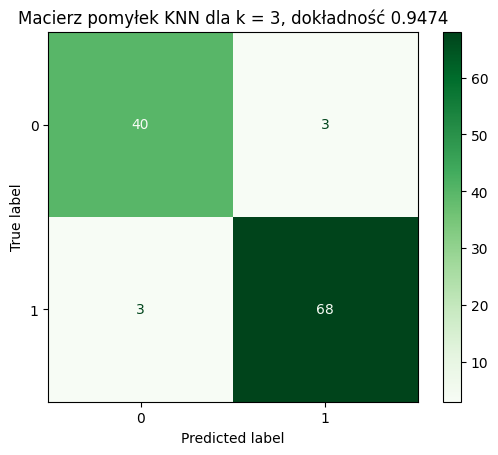

Dokładność dla k = 5: 0.9474


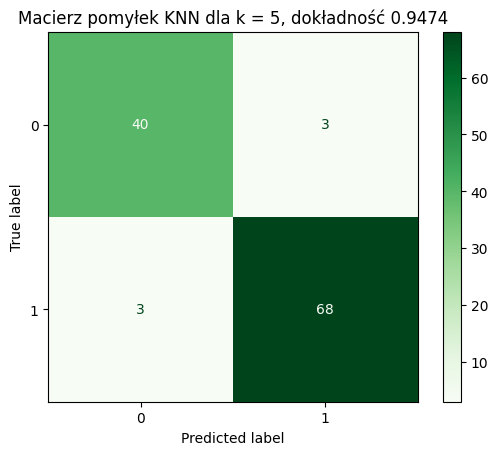

Dokładność dla k = 7: 0.9474


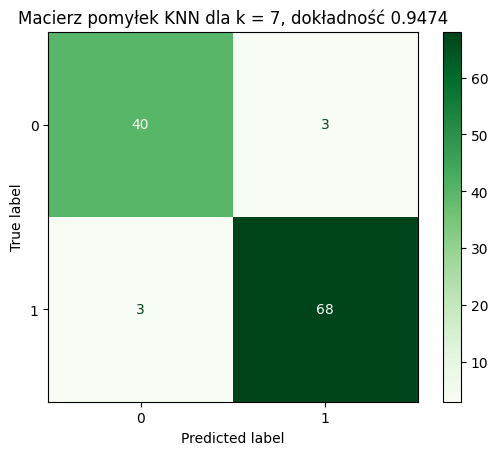

Dokładność dla k = 9: 0.9649


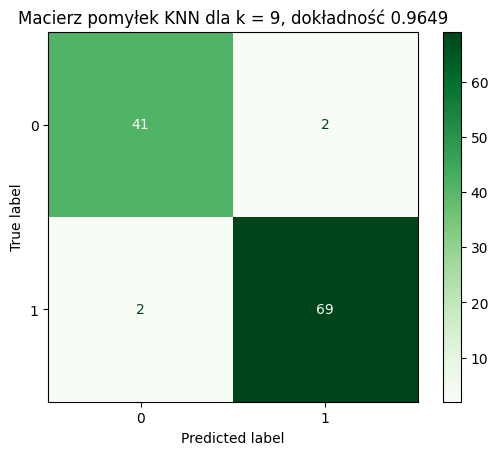

In [40]:
for k in [3,5,7,9]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Dokładność dla k = {k}: {acc:.4f}")

    cm2 = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
    disp.plot(cmap="Greens")
    plt.title(f"Macierz pomyłek KNN dla k = {k}, dokładność {acc:.4f}")
    plt.grid(False)
    plt.show()

## Cross-validation

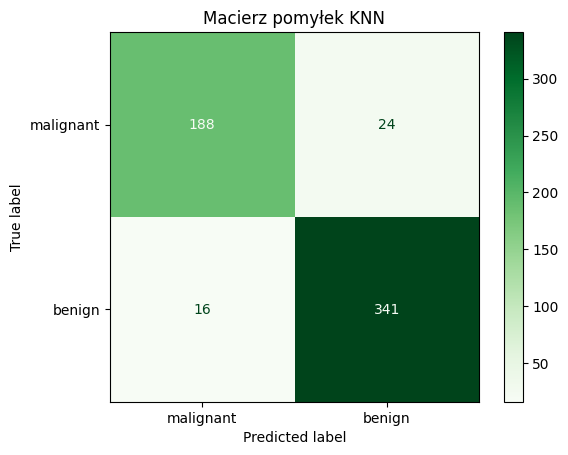

0.9297


In [41]:
from sklearn.model_selection import cross_val_predict

knn = KNeighborsClassifier(n_neighbors=5)
y_pred = cross_val_predict(knn, X, y, cv=10, method='predict')

cm3 = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=data.target_names)
disp.plot(cmap="Greens")
plt.title(f"Macierz pomyłek KNN")
plt.grid(False)
plt.show()

acc3 = accuracy_score(y, y_pred)
print(f"{acc3:.4f}")

# KNN regressor vs Regresja liniowa

In [42]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [43]:
data = fetch_california_housing()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# klasyfikator regresji liniowej
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

In [45]:
# KNN Regressor
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

In [46]:
# funkcja zestawiająca klasyfikatory

def zestawienie(y_true_zs, y_pred_zs):
    return {
        'MSE': mean_squared_error(y_true_zs, y_pred_zs),
        'MAE': mean_absolute_error(y_true_zs, y_pred_zs),
        'R2': r2_score(y_true_zs, y_pred_zs),
    }


print("Regresja liniowa: ", zestawienie(y_test, y_pred_lr))
print("KNN Regressor: ", zestawienie(y_test, y_pred_knn))

Regresja liniowa:  {'MSE': 0.555891598695244, 'MAE': 0.533200130495656, 'R2': 0.5757877060324511}
KNN Regressor:  {'MSE': 0.4324216146043236, 'MAE': 0.4461535271317829, 'R2': 0.6700101862970989}


## Wykres błędów

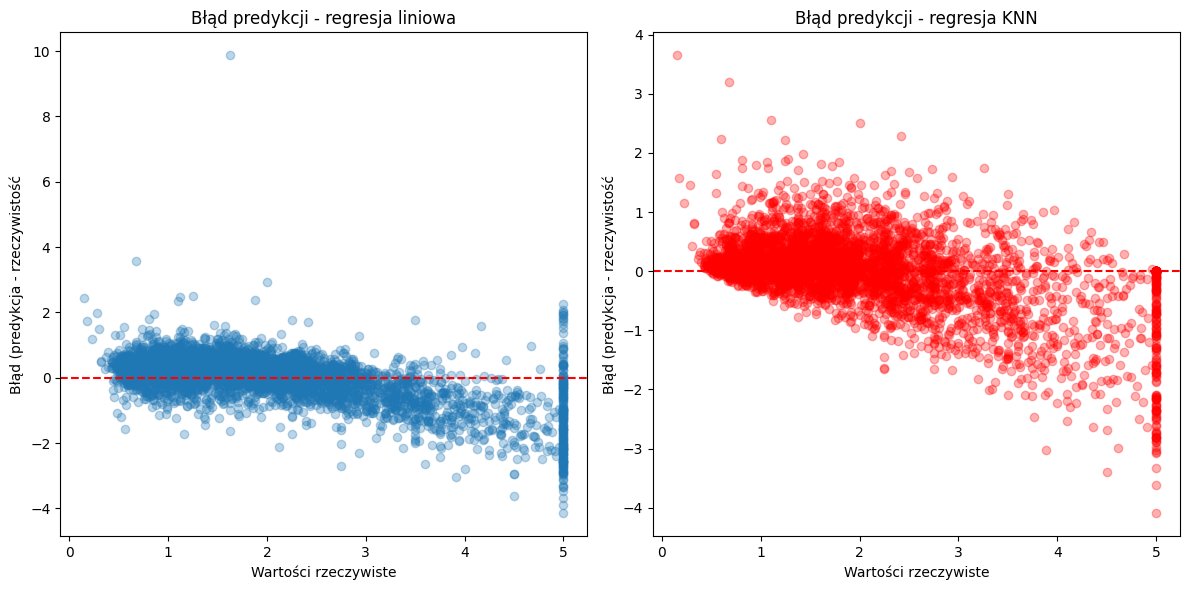

In [47]:
reszta_lr = y_pred_lr - y_test
reszta_knn = y_pred_knn - y_test

plt.figure(figsize=(12, 6))

# regresja liniowa
plt.subplot(1, 2, 1)
plt.scatter(y_test, reszta_lr, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Błąd predykcji - regresja liniowa')
plt.xlabel('Wartości rzeczywiste')
plt.ylabel('Błąd (predykcja - rzeczywistość')

# regresja KNN
plt.subplot(1, 2, 2)
plt.scatter(y_test, reszta_knn, alpha=0.3, color='r')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Błąd predykcji - regresja KNN')
plt.xlabel('Wartości rzeczywiste')
plt.ylabel('Błąd (predykcja - rzeczywistość')

plt.tight_layout()
plt.show()

## Wprowadzanie nowego rekordu i predykcja ceny

In [48]:
nowe_mieszkanie = pd.DataFrame([[5.0, 30.0, 6.0, 1.0, 400.0, 3, 34.0, -118.0]], columns=X.columns)

cena_lr = lr_model.predict(nowe_mieszkanie)[0]
cena_knn = knn_model.predict(scaler.transform(nowe_mieszkanie))[0]

print(f"Cena mieszkania z regresji liniowej: {cena_lr * 100000:.2f} USD")
print(f"Cena mieszkania z KNN Regressor: {cena_knn * 100000:.2f} USD")

Cena mieszkania z regresji liniowej: 244824.57 USD
Cena mieszkania z KNN Regressor: 215860.00 USD


## Sprawdzenie wszystkich danych testowych - zestawienie wyników

In [49]:
idx = 0
score_lr = 0
score_knn = 0
remis = 0

for idx in range(0, len(X_test)):
    print("Iteracja: ", idx, end="\r")
    przyklad = X_test.iloc[[idx]]
    rzeczywista_cena = y_test[idx]
    pred_lr = lr_model.predict(przyklad)[0]
    pred_knn = knn_model.predict(scaler.transform(przyklad))[0]
    blad_lr = abs(pred_lr - rzeczywista_cena)
    blad_knn = abs(pred_knn - rzeczywista_cena)

    if blad_lr < blad_knn:
        score_lr += 1
    elif blad_knn < blad_lr:
        score_knn += 1
    else:
        remis += 1
print(f"lr: {score_lr}, knn: {score_knn}, remis: {remis}")
print(
    f"lr% {score_lr / len(X_test) * 100:.2f}%, knn% {score_knn / len(X_test) * 100:.2f}%, remis% {remis / len(X_test) * 100:.2f}%")

lr: 1657, knn: 2471, remis: 0167Iteracja:  282Iteracja:  284Iteracja:  336Iteracja:  459Iteracja:  463Iteracja:  524Iteracja:  636Iteracja:  695Iteracja:  802Iteracja:  851Iteracja:  977Iteracja:  1025Iteracja:  1151Iteracja:  1193Iteracja:  1340Iteracja:  1366Iteracja:  1511Iteracja:  1539Iteracja:  1674Iteracja:  1717Iteracja:  1851Iteracja:  1890Iteracja:  2033Iteracja:  2065Iteracja:  2223Iteracja:  2225Iteracja:  2402Iteracja:  2577Iteracja:  2751Iteracja:  2895Iteracja:  3070Iteracja:  3241Iteracja:  3425Iteracja:  3609Iteracja:  3790Iteracja:  3951
lr% 40.14%, knn% 59.86%, remis% 0.00%
